# California House Prediction

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fetching data.
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()


In [3]:
# Load the data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


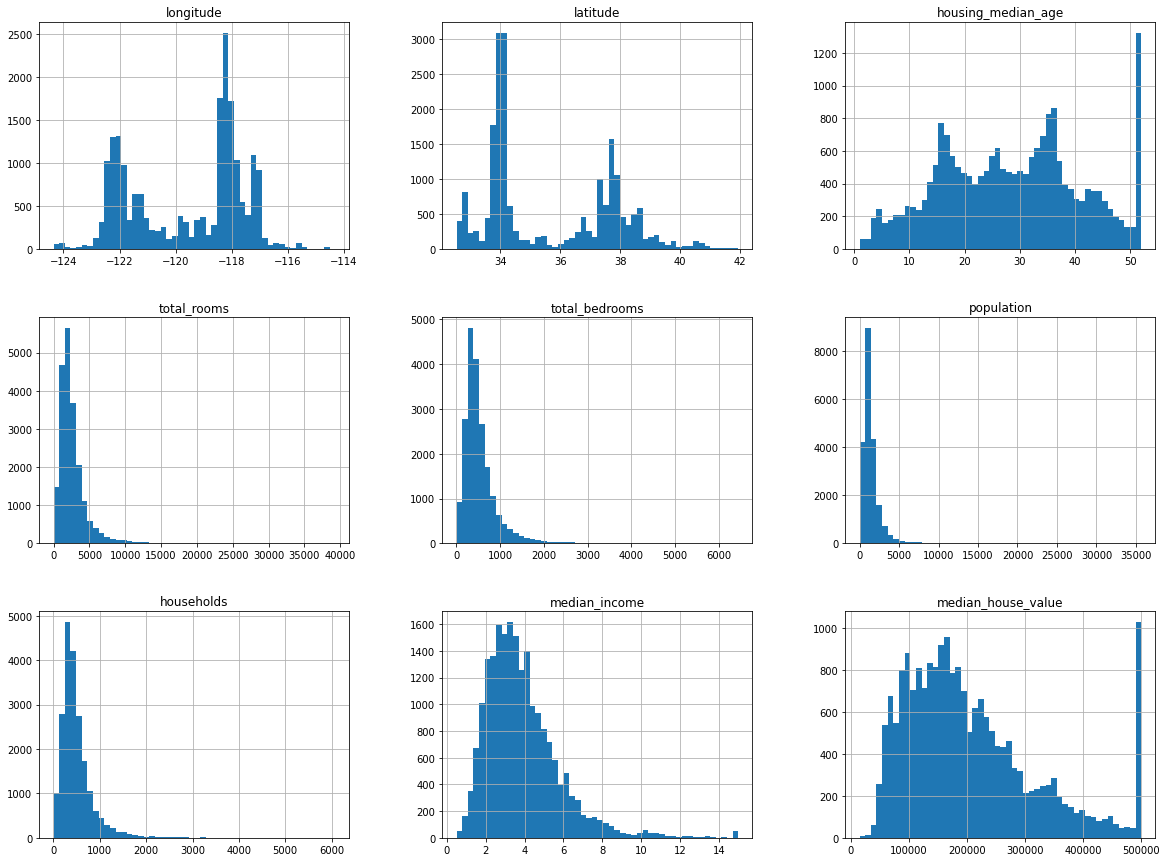

In [8]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

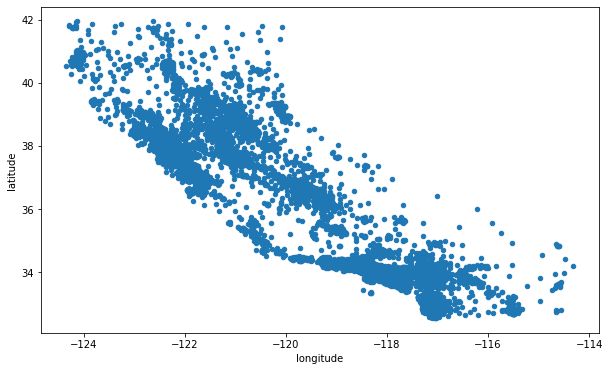

In [11]:
# Visualizing Geographical data (Scatter-plot)
housing.plot(kind="scatter",x="longitude",y="latitude",figsize=(10,6))

### The above plot looks like california.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

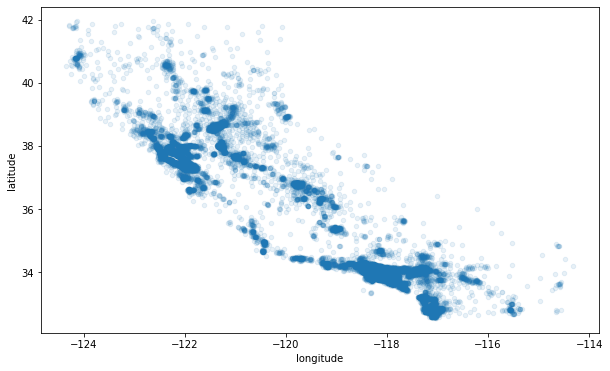

In [12]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,figsize=(10,6))

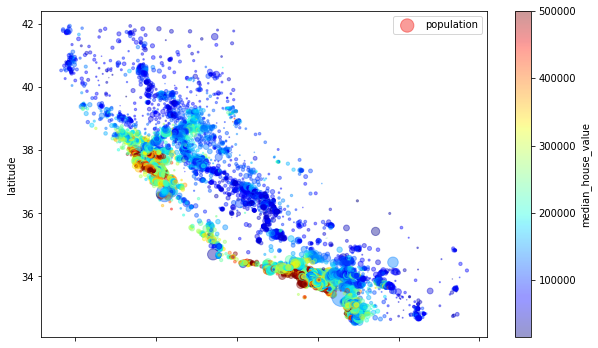

In [13]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
             s=housing["population"]/100,label="population",figsize=(10,6),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

In [14]:
corr_matrix=housing.corr()

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [16]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

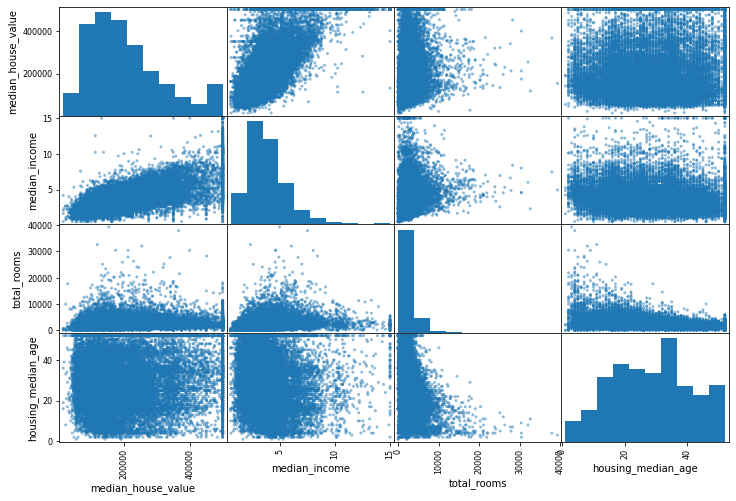

In [17]:
scatter_matrix(housing[attributes],figsize=(12,8))

### From above we can determine that the most promising attribute to predict the median house value is median income

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

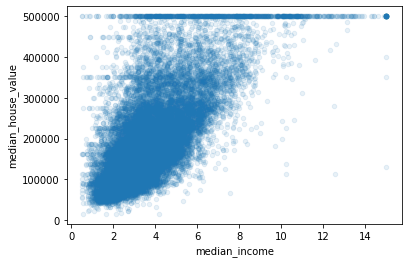

In [18]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

## Data Preparation

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [20]:
# Experimenting with Attribute Combinations
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["pop_per_households"]=housing["population"]/housing["households"]

In [21]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
pop_per_households    -0.023737
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

  The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.

In [22]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


## Data Cleaning

In [23]:
housing.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3


In [24]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [25]:
# Converting the text to numbers.
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [26]:
housing_cat_encoded[700:710]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [3.],
       [1.],
       [0.]])

In [27]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1)

In [28]:
# Fixing the issue with One Hot Encoding.
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_one=cat_encoder.fit_transform(housing_cat)
housing_cat_one

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [29]:
# Converting the sparse matrix into numpy 2D array
housing_cat_one.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [30]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [31]:
# Custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [32]:
housing_extra_attribs.shape

(16512, 12)

## Feature Scaling

- Min-Max scaling (Normalization)
- Standardization

## Transformation Pipelines

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  #Standardization

In [34]:
housing_num=housing.drop("ocean_proximity",axis=1)

In [35]:
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                       ('attribs_adder',CombinedAttributesAdder()),
                       ('std_scaler',StandardScaler()),])
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [36]:
# ColumnTransformer can handle both categorial columns and numerical columns 
# at same time
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([("num",num_pipeline,num_attribs),
                                 ("cat",OneHotEncoder(),cat_attribs),])
housing_prepared=full_pipeline.fit_transform(housing)

In [37]:
housing_prepared[:5]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 , -0.95468705,  0.01739526,
         0.00622264, -0.12112176,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  1.89007821,  0.56925554,
        -0.04081077, -0.81086696,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.95468705, -0.01802432,
        -0.07537122, -0.33827252,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.95468705, -0.59513997,
        -0.10680295,  0.96120521,  0.        ,  0.        ,  0.        ,
         0.        

# Train a model

In [38]:
#linear Regression 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(housing_prepared,housing_labels)

LinearRegression()

In [39]:
# Trying th model on few instances
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)


In [40]:
# Predict
print('Predictions:',lr.predict(some_data_prepared))

Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]


In [41]:
print('Labels:',list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [42]:
# Measure RMSE
from sklearn.metrics import mean_squared_error
housing_predictions=lr.predict(housing_prepared)
lmse=mean_squared_error(housing_labels,housing_predictions)
lrmse=np.sqrt(lmse)
print(lrmse)

68376.51254853733


Shows the model is underfitting the training data meaning the model is not powerful enough or data is not sufficient.

In [43]:
# Training a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tr=DecisionTreeRegressor()
tr.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [44]:
housing_predictions=tr.predict(housing_prepared)
trmse=mean_squared_error(housing_labels,housing_predictions)
trrmse=np.sqrt(trmse)
trrmse

0.0

In [45]:
# Using Cross-Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tr,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
trscre=np.sqrt(-scores)

In [46]:
# Result
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('SD:',scores.std())

In [47]:
display_scores(trscre)

Scores: [73177.97495035 71056.2690537  67723.93038106 70285.65176317
 69824.02267313 78290.81499893 70531.46398105 72204.17692316
 68608.22434143 72347.2291664 ]
Mean: 71404.97582323985
SD: 2794.5250720169925


The performance seems worse than linear Regression.

In [48]:
# Cross-Validation in Linear Regression.
lin_scores=cross_val_score(lr,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [49]:
lin_rmse_score=np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
SD: 3002.746127534865


In [50]:
# RandomForestRegressor.
from sklearn.ensemble import RandomForestRegressor
fr=RandomForestRegressor()

In [51]:
fr_score=cross_val_score(fr,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [52]:
fr_rmse_score=np.sqrt(-fr_score)
display_scores(fr_rmse_score)

Scores: [51108.83925046 48891.90310874 46745.24918103 52089.31666277
 47515.68247415 51768.68651977 52465.96566625 50038.58546152
 48414.9450124  53930.33128333]
Mean: 50296.95046204123
SD: 2233.309625544743


# Fine-tune Your Model

In [53]:
# Best combination of hyperparameter values for RandomForestRegressor.
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
           {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]

In [54]:
fr=RandomForestRegressor()

In [55]:
grid_search=GridSearchCV(fr,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [56]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)